## LAB 2 - Medical Imaging

## Import libraries

In [3]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale
from skimage.transform import iradon

## 1. Generate the modified Shepp-Logan phantom using shepp_logan_phantom. Use the function rescale to get a 256x256 dimension. 

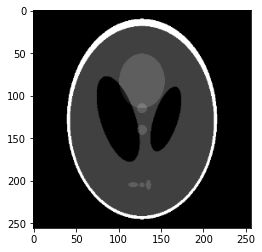

In [4]:
# Loading Shepp Logan Phantom
image = shepp_logan_phantom()

# Rescaling the image
h, w = image.shape
desired_h, desired_w = 256, 256
image = rescale(image, scale=(desired_h/h, desired_w/w))

# Plotting the image
plt.imshow(image, cmap=plt.cm.Greys_r)

## 2. Simulate the sinogram obtained by collecting projections covering [0;180[° in steps of 1° (using radon), and the associated reconstructed image using filtered backprojection (using iradon).

Difference between images: 747.7061406218917


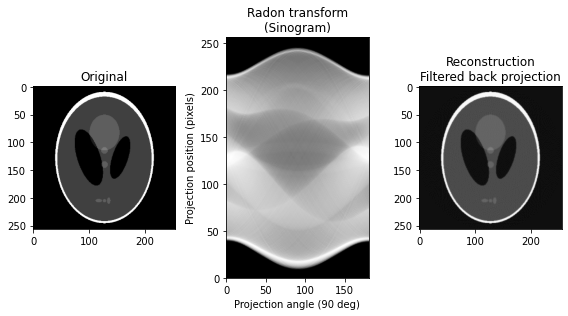

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4.5))

# Plotting the original image
ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

# Creating and plotting the sinogram
theta = np.linspace(0, 180, 180, endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (90 deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

# Reconstructing the image from the sinogram and plotting the result
reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
ax3.set_title("Reconstruction\nFiltered back projection")
ax3.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)

plt.tight_layout()

print("Difference between images:", sum(sum(abs(image - reconstruction_fbp))))

## 3. Repeat the simulation in 2., but now covering [0;90[° and [0;360[°, in steps of 1°. Determine what the minimum angle coverage should be, in theory.

Here with [0;90[°

Difference between images: 6483.912296859107


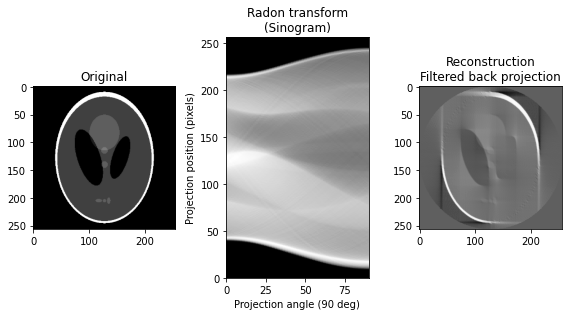

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4.5))

# Plotting the original image
ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

# Creating and plotting the sinogram
theta = np.linspace(0, 90, 90, endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0 * 90.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (90 deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 90.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

# Reconstructing the image from the sinogram and plotting the result
reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
ax3.set_title("Reconstruction\nFiltered back projection")
ax3.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)

plt.tight_layout()

print("Difference between images:", sum(sum(abs(image - reconstruction_fbp))))

Here with [0;360[°

Difference between images: 747.7061406218918


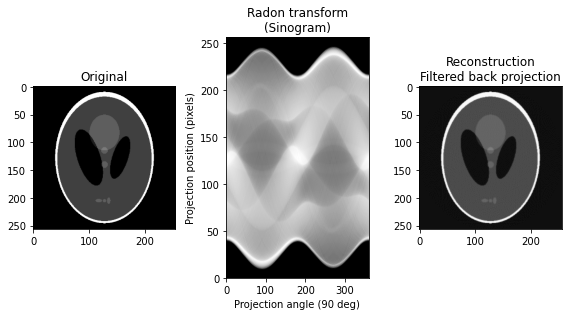

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4.5))

# Plotting the original image
ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

# Creating and plotting the sinogram
theta = np.linspace(0, 360, 360, endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0 * 360.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (90 deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 360.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

# Reconstructing the image from the sinogram and plotting the result
reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
ax3.set_title("Reconstruction\nFiltered back projection")
ax3.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)

plt.tight_layout()

print("Difference between images:", sum(sum(abs(image - reconstruction_fbp))))

The minimum is 180, but 360 give us a better approach. Coverage of a total scan angle of 180º, usually 360º to reduce partial volume effects. 

## 4. Repeat the simulation in 2., covering [0;180[°, but now in steps of 5°. Observe the effects on the sinogram and the reconstructed image. 

We changed theta, 36=180/5

Difference between images: 3272.7341834672525


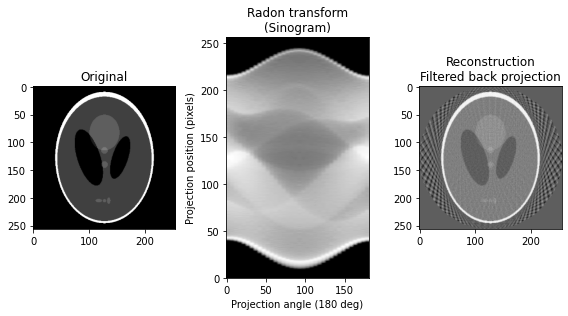

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180.,36, endpoint=False)  
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (180 deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')


reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
ax3.set_title("Reconstruction\nFiltered back projection")
ax3.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)

fig.tight_layout()

print("Difference between images:", sum(sum(abs(image - reconstruction_fbp))))

## 5. Repeat the simulation in 2., by adding noise to the projection data, considering a maximum sinogram intensity of 255 (using the random.poisson function of the numpy library; note that values need to be converted to uint8 type (8-bit unsigned integers) prior to applying this function). 

Difference between images: 39183.78501385329


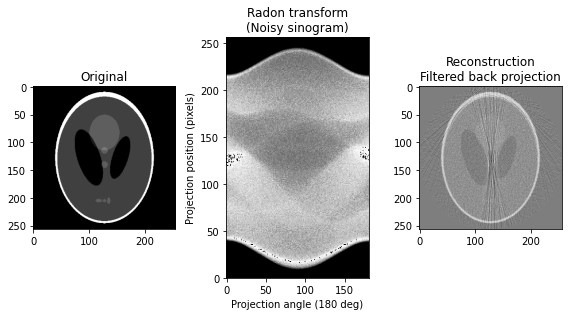

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., 180, endpoint=False)
sinogram = radon(image, theta=theta)
noisy_sinogram = np.random.poisson(sinogram * 255.0 / np.max(sinogram)).astype(np.uint8)
noisy_sinogram1 = noisy_sinogram

dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / noisy_sinogram.shape[0]
ax2.set_title("Radon transform\n(Noisy sinogram)")
ax2.set_xlabel("Projection angle (180 deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(noisy_sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, noisy_sinogram.shape[0] + dy),
           aspect='auto')


reconstruction_fbp = iradon(noisy_sinogram, theta=theta, filter_name='ramp')
ax3.set_title("Reconstruction\nFiltered back projection")
ax3.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)

fig.tight_layout()

print("Difference between images:", sum(sum(abs(image - reconstruction_fbp))))

## 6. Repeat the simulation in 5., by now considering half of the original tube voltage. Compare with 5.

Difference between images: 39183.78501385329


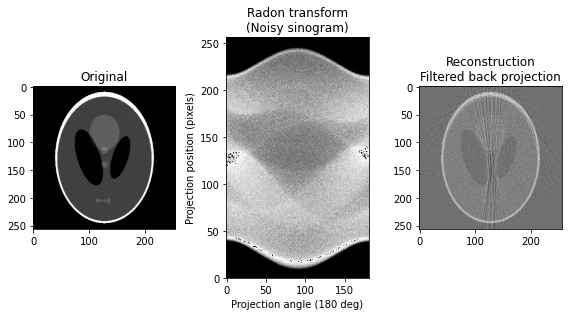

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0, 180, 180, endpoint=False)
sinogram = radon(image, theta=theta)/4
noisy_sinogram = np.random.poisson(sinogram * 255.0 / np.max(sinogram)).astype(np.uint8)
noisy_sinogram2 = noisy_sinogram
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / noisy_sinogram.shape[0]
ax2.set_title("Radon transform\n(Noisy sinogram)")
ax2.set_xlabel("Projection angle (180 deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(noisy_sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, noisy_sinogram.shape[0] + dy),
           aspect='auto')


reconstruction_fbp_half = iradon(noisy_sinogram, theta=theta, filter_name='ramp')
ax3.set_title("Reconstruction\nFiltered back projection")
ax3.imshow(reconstruction_fbp_half, cmap=plt.cm.Greys_r)

fig.tight_layout()
print("Difference between images:", sum(sum(abs(image - reconstruction_fbp))))

Comparing to image 5, there isn't a lot to say about, but the second image theoretically, is supposed to have less SNR.

Difference between images: 41029.86346367334


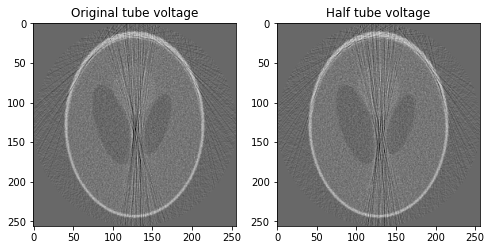

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original tube voltage")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r, vmin=-5, vmax=10)

ax2.set_title("Half tube voltage")
ax2.imshow(reconstruction_fbp_half, cmap=plt.cm.Greys_r, vmin=-5, vmax=10)

print("Difference between images:", sum(sum(abs(reconstruction_fbp_half - reconstruction_fbp))))

## 7. Repeat the simulation in 6., by replacing the original Ram-Lak filter by modified filters (available in iradon), and explain the results as a function of their different frequency responses.

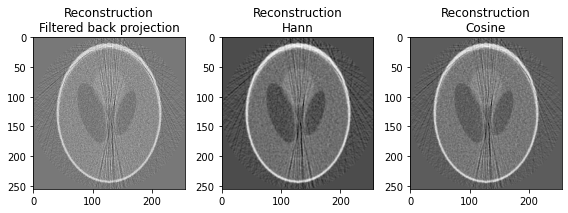

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4.5))

theta = np.linspace(0., 180., 180, endpoint=False)
sinogram = radon(image, theta=theta)/2
noisy_sinogram = np.random.poisson(sinogram * 255.0 / np.max(sinogram)).astype(np.uint8)

reconstruction_fbp = iradon(noisy_sinogram, theta=theta, filter_name='ramp')
reconstruction_hann = iradon(noisy_sinogram, theta=theta, filter_name='hann')
reconstruction_cosine = iradon(noisy_sinogram, theta=theta, filter_name='cosine')

ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)

ax2.set_title("Reconstruction\nHann")
ax2.imshow(reconstruction_hann, cmap=plt.cm.Greys_r)

ax3.set_title("Reconstruction\nCosine")
ax3.imshow(reconstruction_cosine, cmap=plt.cm.Greys_r)

fig.tight_layout()

Explanation 
- Hann and cosine suppress high-frequency components of the Radon transform.
- The Ram-Lak filter has a frequency response that is proportional to the value of the frequency, which gives it a high-pass characteristic.
- The cosine filter has a more gradual transition between the passband and the stopband, which results in a smoother frequency response.

<div style="margin: auto; width: 50%;"><img src="https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs13246-014-0291-8/MediaObjects/13246_2014_291_Fig1_HTML.gif" /></div>